<div class="alert alert-warning">

**Background Material**:

It is highly recommended that the reader work through the introductions to [single variable calculus](https://rsokl.github.io/CogWeb/Math_Materials/Intro_Calc.html) and [multivariable calculus](https://rsokl.github.io/CogWeb/Math_Materials/Multivariable_Calculus.html) as a supplement to this section.
These materials make accessible the most fundamental aspects of calculus needed to get a firm grasp on gradient-based learning.
Even if you are already familiar with calculus, these sections also provide an introduction to automatic differentiation, which will be a critical technology for us moving forward.

</div>


# Gradient-Based Learning

This section is an especially important one - it lays the foundation for understanding the "learning" in "deep learning".
We will be introduced to an important but simple algorithm for numerical optimization known as **gradient descent**; this is the engine that drives the search for reliable model parameter values for many machine learning applications.

Gradient descent is an iterative optimization algorithm by which we can **search for and locate the local minima of a function**.
(Ideally, we would like to work with functions that are convex (bowl-shaped) and thus only have a single global minimum – and we want to find _that_ – but we will seldom find ourselves in such tidy circumstances).
In the context of linear regression, which we were studying in the previous section, we would use gradient descent to search for the slope and $y$-intercept values that minimize the sum of squared residuals between out linear model and our recorded data.

More generally – but still in the context of machine learning – we will use gradient descent to find the model parameter values that minimize a loss function (a.k.a objective function) that compares our model's predictions on observed data to known correct (or "desired") values.
This minimization process, in the context of machine learning, very often is used to facilitate **supervised learning** for our model (more on this later).



## Minimizing a Loss Function

Although we are going to be studying the pure mathematical mechanics of gradient descent for both single variable and multivariable functions here, it is useful to keep our intentions clear and to use symbols that evoke the context of machine learning.
$\mathscr{L}$ **will represent our loss function**,
meaning that it will provide a measure of the quality of our mathematical model's predictions by comparing them to desired or true outcomes.
In particular we will always design $\mathscr{L}$ such that **smaller values returned by** $\mathscr{L}$ **always reflect better-quality predictions from our model**.

$\mathscr{L}$ will have two sources of inputs:

 1. Our mathematical model's parameters (e.g. for our linear model, the slope $m$ and y-intercept $b$). **These are the variables that** $\mathscr{L}$ **depends on**. Let's represent an arbitrary collection of $M$ model parameters as $(w_1, ..., w_M)$
 2. The data and corresponding true data that we have collected and that we are fitting our model to. We do not want to manipulate this data in any way, so **the data is to be treated as a constant in the context of** $\mathscr{L}$. Let's assume that we have $N$ pieces of observed data and corresponding "truth" values (e.g. if $w_{i}$ is a datum among our observations, then $y_{i}$ is the prediction that we _want_ our model to make about this datum). Thus we can represent this generic dataset as $(x_n, y_n)_{n=0}^{N-1}$.

We will write our loss function as

\begin{equation}
\mathscr{L}\big(w_1, ..., w_M ; (x_n, y_n)_{n=0}^{N-1}\big)
\end{equation}


Thus, given our fixed dataset, we want to find the combination of model parameter values that minimize $\mathscr{L}$; we will use gradient descent to achieve this.

<div class="alert alert-info">

**Reading Comprehension: Retracing Our Steps**:

Given a simple linear model

\begin{equation}
F\big((w_1, w_2); x \big) = w_2 x + w_1
\end{equation}

Assuming that we have $N$ pieces of recorded observations and associated "true" outcomes, $(x_n, y_n)_{n=0}^{N-1}$, **write the "mean-squared error" loss function** in terms of the model's parameters, and the individual pieces of data.

Refer back to the section on linear regression for a refresher on this particular loss function.
</div>

## A Simple Overview of Gradient Descent

We assume that the function we seek to minimize is smooth and continuous such that we can evaluate its derivative anywhere in its input domain (consider, for instance, a parabola).
Suppose, for simplicity's sake, that we are working with a single variable function, $\mathscr{L}(w)$.
Given some current value of $w$ ($w_\mathrm{old}$), gradient descent provides us with a process for finding a nearby value of $w$ ($w_\mathrm{new}$) such that $\mathscr{L}(w_\mathrm{new}) < \mathscr{L}(w_\mathrm{old})$.

The following equation prescribes a single iteration for updating the value of $w$ that serves as our current "best guess" for the location of a minimum of $\mathscr{L}$; it specifies a single "step" of gradient descent for a single variable function:

\begin{equation}
w_\mathrm{new} = w_\mathrm{old} - \delta \frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}\bigg|_{w=w_\mathrm{old}}.
\end{equation}

Here $\delta$ is a _positive number_ – a constant – that we specify; it is often called the the **learning rate**, as it scales the magnitude of the update made to $w_\mathrm{old}$. Note that we often choose our very first value of $w_\mathrm{old}$ by literally picking a random number. We often pick some reasonably-small number from some statistical distribution (tons of caveats to be made here, which we will get to later).

The quantity $\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}|_{w=w_\mathrm{old}}$ is the (instantaneous) slope of $\mathscr{L}(w)$ _at the point_ $w_\mathrm{old}$; if it is a positive number, then, by definition, slightly increasing $w$ from $w_\mathrm{old}$ will produce an increase in the value of $\mathscr{L}(w)$.
Thus $-\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}|_{w=w_\mathrm{old}}$  (note the negative sign) says: "move $w$ in the direction that _decreases_ $\mathscr{L}(w)$ in the neighborhood of that point."
Hence this process will guide our updates to $w$ so as to progressively _descend_ $\mathscr{L}(w)$.

We will see that derivative of the single-variable function $\mathscr{L}(w)$ plays the same role as the gradient of multivariable functions; this is why the process is generally called "gradient descent" and not "derivative descent".

### Descending a Parabola

Let's make gradient descent a bit more concrete.
Suppose we want to find the global minimum of $\mathscr{L}(w) = w^2$ (we known that this function is convex, thus it has a single global minimum and no other flat regions).
We already know that the minimum for this function lies at $w = 0$ (it is immediately apparent simply from plotting the function), but it is useful regardless to see that gradient descent can find this minimum.

We must keep in mind that gradient descent requires that we be able to evaluate $\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}$ at any value of $w$.
For $\mathscr{L}(w)=w^2$, [its derivative is simply](https://rsokl.github.io/CogWeb/Math_Materials/Intro_Calc.html#Common-Derivatives) $\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w} = 2w$, and so evaluating the derivative is trivial!
For more complicated functions, we will be grateful to have autodifferentiation libraries, which will evaluate derivatives for us without our having to do any calculus by hand.

Let's start off with $w_\mathrm{start}=10$, and perform **five steps** of gradient descent using a learning rate of $\delta=0.3$ (there is no principled reason for us picking this particular value for $\delta$ - it simply suits this example well; more on selecting learning rate later).

\begin{align}
w_\mathrm{new} &= w_\mathrm{old} - \delta \frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}\bigg|_{w=w_\mathrm{old}}\\
w_\mathrm{new} &= w_\mathrm{old} - (0.3) (2 w_\mathrm{old})\\
&\Downarrow \\
4 &= 10 - (0.3) (2 \times 10)\\
1.6 &= 4 - (0.3) (2 \times 4)\\
0.64 &= 1.6 - (0.3) (2 \times 1.6)\\
0.256 &= 0.64 - (0.3) (2 \times 0.64 )\\
0.1024 &= 0.256 - (0.3) (2 \times 0.256)\\
\end{align}

See that the sequence of $w$ values indeed corresponds to a "descent" down $\mathscr{L}(w)$, towards $w=0$.

Notice that even though the learning rate, $\delta=0.3$, is constant, the distance between subsequent $w$-values gets shorter as they near $w_\mathrm{min}$;
this is due to the fact that $\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}$, which multiplies $\delta$, naturally shrinks in magnitude near the minimum (i.e. the slope approaches zero), and thus the update to $w_\mathrm{old}$ becomes more "refined" in its vicinity.

We stopped the gradient descent process where we did out of sheer convenience; 
we don't usually carry our gradient descent by hand – we will have a computer do the hard work for us!
The terminal value of $w_\mathrm{stop} = 0.1024$ isn't especially close to the true minimum of the parabola, but we cannot make a decision about "how close is close enough" in a principled way without having additional context about _why_ we want to find this minimum.
In practice, we will need some additional metric of success to inform how close is "close enough" when we are searching for the minimum of a function.
For our present purposes, this example simply demonstrates the mechanics of and logic behind gradient descent.
The following two reading comprehension questions are particularly important for cementing these takeaways.

<div class="alert alert-info">

**Reading Comprehension: Descent Down a Parabola in Python**:

Complete the following Python function that implements gradient descent on $\mathscr{L}(w) = w^2$.

```python
import numpy as np

def descent_down_parabola(w_start, learning_rate, num_steps):
    """
    Performs gradient descent on L(w) = w ** 2, returning the sequence
    of x-values: [w_start, ..., w_stop]
    
    Parameters
    ----------
    w_start : float
        The initial value of w.
    
    learning_rate : float
        The "learning rate" factor for each descent step. A positive number.
    
    num_steps : int
        The number subsequent of descent steps taken. A non-negative number.
    
    Returns
    -------
    numpy.ndarray, shape-(num_steps + 1, )
        The sequence of w-values produced via gradient descent, starting with w_start
    """
    # YOUR CODE HERE
```    

Test your function using the inputs `w_start=10`, `learning_rate=0.3`, and `num_steps=5` and confirm that your function reproduces the results presented in this discussion.
Repeat this computation using `w_start=-10`, and see that gradient descent reliably coaxes $w$ in the opposite direction – still towards the global minimum of the parabola.

</div>

### Convergence

Studying the equation for gradient descent for a single-variable function, when will the updates that it yields "converge" to an answer? That is, when will our update say $w_\mathrm{new} \approx w_\mathrm{old}$?
This will occur when $\delta \frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w} \approx 0$, which is to say that this will occur whenever we reach a plateau in out loss landscape. Determining just how flat a region of a function must be for it to be considered a plateau ultimately depends on the size of $\delta$.

At a plateau, the process of gradient descent will have **converged** upon some terminal value – further iterations via gradient descent will only yield inconsequentially-small updates to this terminus.
If the function has no such flat region, then the gradient descent algorithm will produce perpetual revisions to $w_\mathrm{new}$ that descend further into the abyss of negative infinity.

The following image depicts three varieties of plateaus: a maximum, a saddle point, and a minimum. 

See that these are all places (marked by the red x's) where the slope of the function of interest is $0$; thus there is some neighborhood about each of these points for which $\delta \frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w} \approx 0$.
Gradient descent should never lead us "up" a function, so the local maximum is not a feature that we will need to worry about, but saddle points and local minima are certainly places where this algorithm can converge to.  

<div class="alert alert-info">

**Reading Comprehension: Analyzing Descent Convergence**:

Using your implementation of `descent_down_parabola`, and the inputs `w_start=10`, `learning_rate=0.3`, and `num_steps=100`, [use matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html) to make a plot of "Distance of $w$ from Minimum vs Number of Steps".
You should see that $w$ approaches $0$ so rapidly that it is hard to discern its trajectory on a linear scale;
try plotting the $y$-axis on a log scale (you can use `ax.set_yscale("log")`).

Describe the mathematical form of the trajectory of $w$ towards the minimum.
Does the process of gradient descent ever lead $w$ away from the minimum?
Try experimenting with different learning rates before you come to a final conclusion.

</div>

## Gradient Descent on Multi-Variable Functions

The utility of gradient descent might seem questionable when we only consider functions of one variable.
In these cases, it seems like we can simply plot such a function and locate minima by eye!
Let's remember, however, that we are going to want to employ gradient descent to obtain optimal values for the parameters of sophisticated mathematical models used in the context of machine learning.
In the case of our simple linear regression problem, this means working with a function of two variables.
That being said, once we graduate to working with neural networks, we will find ourselves soon working with mathematical models represented by functions of _hundreds, thousands, millions,_ [or even billions](https://en.wikipedia.org/wiki/GPT-3) of variables!

Needless to say, once we are working with functions of several variables, we will have no hope of visualizing our function so as to simply locate its minima by eye.
Instead, we will be like [a mountain climber trying to descend a mountain covered in a thick fog](https://en.wikipedia.org/wiki/Gradient_descent#An_analogy_for_understanding_gradient_descent): we can only attempt to find our way down the mountain by feeling the way that the ground slopes under our feet and systematically stepping in the direction that slopes most downward.
(Note that this process of "feeling the slope of the mountain" is an analogy for evaluating the [gradient](https://rsokl.github.io/CogWeb/Math_Materials/Multivariable_Calculus.html#Taking-a-Derivative-Along-Any-Direction-Using-the-Gradient) of our multi-variable function; it reveals only the local topography of the mountain at a particular point in space.)

Ultimately, gradient descent is a process by which we can find a minimum of a multi-variable function.
E.g. if we were working with a function of three variables, $\mathscr{L}(w_1, w_2, w_3)$, then gradient descent would permit us to search for the point $(w_1, w_2, w_3)_\mathrm{min}$ that corresponds to a local minimum of $\mathscr{L}$.

Fortunately, the general equation for the gradient step of multiple variables is quite straightforward.
Suppose that we are performing gradient descent  with a function of $M$ variables, $\mathscr{L}(w_1, ..., w_M)$.
Then **the set of M equations describing a single iteration of gradient descent on a function of M variables is as follows**

\begin{equation}
\begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_M \end{bmatrix}_\text{new} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_M \end{bmatrix}_\text{old} - \delta\: \begin{bmatrix} \frac{\partial \mathscr{L}}{\partial w_1} \\ \frac{\partial \mathscr{L}}{\partial w_2} \\ \vdots \\ \frac{\partial \mathscr{L}}{\partial w_M} \end{bmatrix}_\text{old}
\end{equation}

Once again, $\delta$ plays the role of the so-called "learning rate".
Note that the same learning rate value is used across each of the $M$ dimensions here.

To reiterate, the single equation above specifies $M$ *separate equations* – each one is a "recipe" for updating the value of a corresponding variable in search for a minimum of $\mathscr{L}$.
We invoke [vector notation](https://rsokl.github.io/CogWeb/Math_Materials/LinearAlgebra.html) to more concisely express these "parallel" equations.
Let's focus on the update being made to the $j^\text{th}$ variable to see just how closely it resembles the form for gradient descent of a single-variable function.

\begin{equation}
w_{j}^{\mathrm{new}} = w_{j}^{\mathrm{old}} - \delta\:\Bigg( \frac{\partial \mathscr{L}(w_1, ..., w_M)}{\partial w_j}\bigg|_{w_1=w_{1}^{\mathrm{old}} \dots w_M=w_{M}^{\mathrm{old}}}\Bigg)
\end{equation}

See that we utilize the [partial derivative](https://rsokl.github.io/CogWeb/Math_Materials/Multivariable_Calculus.html#What-is-a-Partial-Derivative?) of $\mathscr{L}$ with respect to $w_j$ here, which measures the instantaneous slope of $\mathscr{L}$ along $w_j$, holding all other variables fixed.

Mechanically speaking, we we simply replaced the derivative of $\mathscr{L}(w)$ with a partial derivative, and replicated the equation in correspondence with each of the $M$ variables of $\mathscr{L}$; that being said, this generalization is not made haphazardly.
We will see that this is indeed the _optimal_ formula for searching for a minimum of $\mathscr{L}$ if we are only to use its first-order derivatives.
Towards this end, it is critical to note that the collection of partial derivatives $\begin{bmatrix} \frac{\partial \mathscr{L}}{\partial w_1} & \cdots & \frac{\partial \mathscr{L}}{\partial w_M} \end{bmatrix}$ is far more special than it might appear;
this is, in fact, **the gradient of** $\mathscr{L}(w_1, ..., w_M)$

\begin{equation}
\vec{\nabla} \mathscr{L}(w_1, w_2, \dots, w_M)=\begin{bmatrix} \frac{\partial \mathscr{L}}{\partial w_1} & \frac{\partial \mathscr{L}}{\partial w_2} & \cdots & \frac{\partial \mathscr{L}}{\partial w_M} \end{bmatrix}.
\end{equation}

The gradient of $\mathscr{L}$, $\vec{\nabla} \mathscr{L}$, is a vector-field that has the special property that it [always points in the direction of steepest ascent](https://rsokl.github.io/CogWeb/Math_Materials/Multivariable_Calculus.html#Properties-of-the-Gradient) on $\mathscr{L}$ wherever it is evaluated (it is worthwhile to review [our content on linear algebra](https://rsokl.github.io/CogWeb/Math_Materials/LinearAlgebra.html) and [multivariable calculus](https://rsokl.github.io/CogWeb/Math_Materials/Multivariable_Calculus.html#) to better digest this).
This means that $\vec{\nabla} \mathscr{L}(\vec{w}_{\mathrm{old}})$ provides us with critically-important information: it tells us, based on our current model parameter values ($\vec{w}_{\mathrm{old}}$) and our knowledge of its first-order derivatives at this point, the _best_ incremental update that we can make to our model's parameters in order to minimize $\mathscr{L}$.
In the same way that an individual derivative describes the slope of a function along a single direction, the gradient of a function indicates how that function changes along multiple dimensions.

Rewriting the gradient update using this gradient notation, and representing $(w_1, \dots, w_M)$ as the vector $\vec{w}$, we have

\begin{equation}
\vec{w}_\mathrm{new} = \vec{w}_\mathrm{old} - \delta \, \vec{\nabla} \mathscr{L}(w_1, \dots, w_M)\big|_{\vec{w}=\vec{w}_\mathrm{old}}
\end{equation}


Thus the equation of gradient descent indicates that $\vec{w}_\mathrm{old}$ is always "nudged" in the direction of steepest _descent_ of $\mathscr{L}$, as dictated by $-\vec{\nabla} \mathscr{L}$.

<div class="alert alert-warning">

**Looking Ahead: Automatic Differentiation**

The sorts of mathematical models that are used to in deep learning represent functions of **many** variables (thousands of variables would often times be be on the _low_ end!) – so many that it would be hopeless for us to derive all of the partial derivatives, $\begin{bmatrix} \frac{\partial \mathscr{L}}{\partial w_1} & \frac{\partial \mathscr{L}}{\partial w_2} & \cdots & \frac{\partial \mathscr{L}}{\partial w_M} \end{bmatrix}$, by hand in order to perform gradient descent!

Fortunately, many powerful and easy-to-use software libraries have emerged that are designed to perform **automatic differentiation**.
An automatic differentiation library provides one with a wide array of tools for performing standard mathematical calculations (similar to using NumPy), but these tools are designed so that you can use them to compute the outputs of large functions _and_ to have them evaluate the function's derivatives!
In this way you need not write a single derivative yourself.
So-called "autodiff" libraries are thus absolutely essential tools for conducting any sort of gradient-based optimizations on sophisticated mathematical models.

In the next section, we will familiarize ourselves with the simple automatic differentiation library known as [MyGrad](https://mygrad.readthedocs.io/en/latest/).
This library was designed first and foremost as an educational tool; in fact, it was originally developed specifically for CogWorks!
</div>

### Descending a Parabaloid Using Gradient Descent

As always, it is important that we make concrete the mathematical foundation that we are laying by working through an example.
Let's descend the parabaloid surface

\begin{equation}
\mathscr{L}(w_1, w_2) = 2 w_1^2 + 3 w_2^2
\end{equation}

First, we need to [compute the gradient](https://rsokl.github.io/CogWeb/Math_Materials/Multivariable_Calculus.html#Taking-a-Derivative-Along-Any-Direction-Using-the-Gradient) for $\mathscr{L}(w_1, w_2)$ by writing out its [partial derivatives](https://rsokl.github.io/CogWeb/Math_Materials/Multivariable_Calculus.html#What-is-a-Partial-Derivative?)

\begin{equation}
\frac{\partial\mathscr{L}}{\partial w_1} = 4 w_1\\\
\frac{\partial\mathscr{L}}{\partial w_2} = 6 w_2\\\
\end{equation}

Thus the gradient of $\mathscr{L}$ is given by the following vector field


\begin{equation}
\vec{\nabla} \mathscr{L}(w_1, w_2) = \begin{bmatrix} \frac{\partial \mathscr{L}}{\partial w_1} & \frac{\partial \mathscr{L}}{\partial w_2} \end{bmatrix} = [4 w_1, 6 w_2]
\end{equation}

which is simple to evaluate at any point $(w_1, w_2)$ during our descent.

(Note: it just happens to be the case that $\frac{\partial\mathscr{L}}{\partial w_1}$ only depends on $w_1$ and $\frac{\partial\mathscr{L}}{\partial w_2}$ only depends on $w_2$ here.
In general, each partial derivative of $\mathscr{L}$ could depend on any/all of the model's parameters).

Starting with $\vec{w}_\mathrm{old} = [2, 4]$ and using a learning rate of $\delta=0.1$.
We'll take five steps down $\mathscr{L}$ using gradient descent.

(For the sake of legibility, we are rounding to two decimal places)

\begin{align}
\vec{w}_\mathrm{new} &= \vec{w}_\mathrm{old} - \delta \vec{\nabla} \mathscr{L}|_{\vec{w}=\vec{w}_\mathrm{old}}\\
\vec{w}_\mathrm{new} &= \vec{w}_\mathrm{old} - \delta \begin{bmatrix} \frac{\partial \mathscr{L}}{\partial w_1}|_{\vec{w}=\vec{w}_\mathrm{old}} & \frac{\partial \mathscr{L}}{\partial w_2}|_{\vec{w}=\vec{w}_\mathrm{old}} \end{bmatrix}\\
\vec{w}_\mathrm{new} &= [w^{\mathrm{(old)}}_1, w^{\mathrm{(old)}}_2] - (0.1) [4 w^{\mathrm{(old)}}_1, 6 w^{\mathrm{(old)}}_2]\\
&\Downarrow \\
[1.20    , 1.60    ] &= [2.00, 4.00] - (0.1) [8.00, 24.0]\\
[0.72   , 0.64   ] &= [1.20    , 1.60    ] - (0.1) [ 4.8    ,  9.6    ]\\
[0.43  , 0.26  ] &= [0.72   , 0.64   ] - (0.1) [ 2.88   ,  3.84   ]\\
[0.26 , 0.10] &= [0.43  , 0.26  ] - (0.1) [ 1.73  ,  1.54  ]\\
[0.16, 0.04] &= [0.26 , 0.10] - (0.1) [ 1.04 ,  0.61 ]\\
\end{align}

The following figure depicts this paraboloid, along with the five-step trajectory that we just calculated.

Once again, the iterative process of gradient descent guides us towards parameter values towards the minimum of $\mathscr{L}$, which resides at $(0, 0)$; however this time we invoke the gradient of a multivariable function instead of the derivative of a single variable function, so that we can search for the minimum within a higher dimensional space.
And to reiterate our previous discussion: whether our last "best guess" at a minimum – $(0.16, 0.04)$ – is "good enough" would depend on the broader context of _why_ we want to find this minimum.
In the context of a machine learning problem, "good enough" might be informed by how consistently our model, whose parameters are given by this best guess, makes predictions that are in agreement with collected data.

<div class="alert alert-info">

**Reading Comprehension: Descent Down a Parabolic Surface in Python**:

Complete the following Python function that implements gradient descent on the skewed paraboloid $\mathscr{L}(w_1, w_2) = 2 w_1^2 + 3 w_2^2$.

Note that the partial derivatives of this function are simply
    
\begin{equation}
\frac{\partial \mathscr{L}(w_1, w_2)}{\partial x} = 4 w_1 \\
\frac{\partial \mathscr{L}(w_1, w_2)}{\partial y} = 6 w_2 \\
\end{equation}

```python
import numpy as np

def descent_down_2d_parabola(w_start, learning_rate, num_steps):
    """
    Performs gradient descent on L(w1, w2) = 2 * w1 ** 2 + 3 * w2 **2 , 
    returning the sequence of w-values: [w_start, ..., w_stop]

    Parameters
    ----------
    w_start : np.ndarray, shape-(2,)
        The initial value of (w1, w2).

    learning_rate : float
        The "learning rate" factor for each descent step. A positive number.

    num_steps : int
        The number subsequent of descent steps taken. A non-negative number.

    Returns
    -------
    numpy.ndarray, shape-(num_steps + 1, 2)
        The sequence of (w1, w2)-values produced via gradient descent, starting 
        with w_start
    """
    # YOUR CODE HERE
```    

Test your function using the inputs `w_start=np.array([2.0, 4.0])`, `learning_rate=0.1`, and `num_steps=5` and, by hand, confirm that your function correctly performed the first gradient step.
Repeat this computation using `xy_start=np.array([-2.0,-4.0])`, and see that gradient descent reliably coaxes $\vec{w}$ in the opposite direction - still towards the global minimum of the paraboloid.

</div>

## The "Hyperparameters" of Gradient Descent

Reflect on your implementation of `descent_down_2d_parabola` from the reading comprehension problem above.
Assuming that the specific function being optimized by gradient descent is fixed, what are the pieces of information that are needed to specify the rest of the implementation of the algorithm?

There are three configurable aspects to this "vanilla" implementation of gradient descent (there are variations of gradient descent that include more configurable aspects):

1. The method by which we choose the initial values for $\vec{w}_{\mathrm{old}}$.
2. The value of the learning rate, $\delta$.
3. The criterion for ending the algorithm (i.e. determining when the computer should stop computing values for $\vec{w}_{\mathrm{new}}$).


these are often referred to as the **hyperparameters** of gradient descent.

The term **"hyperparameter" is used to distinguish a parameter that is used to configure an aspect of a machine learning algorithm**, whereas the term **"parameter" is used to refer to a value that is subject to being updated by the machine learning algorithm itself.**
Thus $\vec{w}$ is a vector of *parameters*, which are revised by the gradient descent algorithm, whereas $\delta$ is a *hyperparameter* whose value must be determined independently as a pre-condition of using gradient descent.
Note that a hyperparameter need not always refer to a numerical value, as it does in the case of $\delta$; neither the initialization scheme nor termination criterion for gradient descent can be represented by a single number, but their configurations are nonetheless necessary for implementing gradient descent and thus they are deemed to be hyperparameters. 


So how do we go about selecting these hyperparameters?
The answer invariably is: _it depends_.
It depends on the problem that we are interested in solving, the specifics of the mathematical model whose parameters we are tuning, and what our criterion for "success" is.
For sufficiently simple or well-behaved functions (like a convex function), there are rigorous approaches to choosing these hyperparameters in a way that provides nice theoretical guarantees for our results (e.g. "using these specific hyperparameters, you are guaranteed to be within some concrete $\epsilon$ of the function's global minimum").
However, neural networks are not amenable to these rigorously-founded guidelines.
Rather, **the means by which the hyperparameters are chosen for neural networks is more a matter of practiced art than it is a consequence of mature theoretical foundations**.
(Hopefully this will not be the case for long, and that theoretical results will be developed to help inform this process for neural networks.)

Let's discuss some of the common, high-level strategies for choosing these hyperparameters, with the understanding that we will fill details as we apply gradient descent on concrete machine learning problems.


### Choosing A Parameter Initialization Scheme

Given our mathematical model, $F\big((w_1, ..., w_M); (x_n)_{n=0}^{N-1}\big)$, where $(x_n)_{n=0}^{N-1}$ represents our collected input data, we need to choose some definite values for the model's parameters $(w_1, ..., w_M)$ so that the model can be used to produce concrete results, from which we can evaluate a loss, $\mathscr{L}$, and then use gradient descent to refine these parameters. 
**Often times we will draw these initial values from random statistical distributions**, such as a Gaussian distribution.

In the context of deep learning, where a neural network is used as our mathematical model, there are [a handful of popular initialization techniques](https://mygrad.readthedocs.io/en/latest/nnet.html#initializers) that are derived based on some rough assumptions about the distribution of data, $(x_n)_{n=0}^{N-1}$, that one is working with as well as the so-called "activation functions" one uses within the neural network (more on this later).

Over the past several years, popular neural network architectures and regularizations schemes have emerged that serve to greatly diminish the importance of any particular initialization scheme.
This wasn't always the case; methods used in the early-to-mid 2010's to construct neural networks were such that the particular initialization scheme used could make all the difference between a model that could be deftly tuned by gradient descent and one for which gradient descent made no useful progress at all. 

### Choosing A Learning Rate

Choosing a suitable learning rate for your problem is very important; using a $\delta$ that is too big can cause your parameter values to update too severely, which can cause the desirable minimum in the loss landscape to be "leapt" over.
A learning rate can be so large as to make your model's performance diverge to an ever-worsening state.
On the other hand, choosing a very small learning rate can guarantee that our model will never diverge and that a landscape minimum will never be leapt over, but it also can mean that the progress that we make in tuning our model is very slow, and that we will be trapped by intermediate and non-ideal plateaus in the loss landscape.

In practice, we can often simply refer to other work that uses gradient descent on a model relevant to our own to get a sense of what an appropriate learning rate value might be.
That being said, it is still useful to consider how we might try to find a good value on our own.

First, we want to find the appropriate **order of magnitude** (i.e. multiple of ten) for our learning rate.
A desirable learning rate is one that prompts a reliable descent down our loss landscape's minima in a "reasonable" number of steps (i.e. not so many that it is prohibitively expensive).

Let's return to the problem of performing gradient descent down $L(w) = w^2$.
The following plots compares the performance of gradient descent across five orders of magnitude of learning rates.
Each run starts at $w_{\mathrm{old}}=100$ and lasts for $1,000$ iterations. 
(Note that these plot can be easily be reproduced by making a simple modification to the solution of the "Analyzing Descent Convergence" reading comprehension problem. In essence: put the solution in a for-loop over learning rates.)

See that the quality of our results – **how close** we get to the minimum of our function, and **how quickly** we get there – varies wildly across the orders of magnitudes of learning rates that we compare here.

The learning rate $\delta = 0.1$ is clearly the winning pick in this example;
the smaller learning rates eventually lead to a comparable final solution, but they do so *much* more slowly.
The next-largest learning rate takes ten times as long to descend the loss landscape (which makes sense if you consider that we are taking steps that are roughly one tenth as large at this rate).

That being said, we have certainly found a sweet spot;
increasing the learning rate to $\delta = 0.999$ appears greatly deteriorate the rate of convergence;
here we are leaping back and forth across the parabola's minimum, but _slowly_ making our way to the minimum as we do so.
Bumping the learning rate above $\delta = 1.0$ leads to a diverging trajectory.

While this example is an overly-simplistic one, it teaches an important lesson that holds quite broadly: picking the right order of magnitude for your learning rate can make all of the difference when optimizing the parameters of your model.
A model can be made to look incapable of "learning" a problem if this hyperparameter is poorly chosen.

Once you are in the ballpark of the correct order of magnitude for your learning rate, you can do a finer-grained search within that neighborhood of learning rates.
This too can reveal a niche of improved performance (although it must be noted that more realistic problems – ones that don't involve optimizing over a very nice, convex function – will likely not exhibit such dramatic differences at this level).
Note that it can be beneficial to do a random sampling over this small region of learning rates rather than a uniform, grid-based sampling as we have done here.

There is plenty more to say about performing [hyperparameter tuning](https://scikit-learn.org/stable/modules/grid_search.html), and there are particularly important remarks to be made about using methods [like cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) to avoid tuning hyperparameters to become "overfit" to the particular data, $(x_n, y_n)_{n=0}^{N-1}$, that we are feeding our model.
Additionally, the learning rate can be adjusted during gradient descent.
For example, you can decrease the learning rate by a constant factor every $N$ steps, in hopes that you will take "more discerning" steps as you get closer to the desirable minima of the loss landscape.
This is broadly referred to as a "learning rate schedule".

That being said, these topics are beyond the scope of this already-burgeoning sub-sub-section. 

### Choosing a Stopping Condition

We generally end gradient descent (or perhaps change our learning rate) when it looks like we have reached a plateau in our function.
In the plot above - comparing gradient descent down a parabola using different learning rates - we can see such plateaus manifest.
The red curve (the one that makes the fastest descent) indicates that our search for the global minimum started near $\mathscr{L}(w_\mathrm{new})=80$  (it actually started at $100$, but changed so quickly that the plot couldn't capture it) and quickly plumetted to $\mathscr{L}(w_\mathrm{new})\approx 0$.
At this point we would need to change the scale of our $\mathscr{L}$ axis to see if we are making any progress, but based on our initial scale we certainly no longer see meaningful progress.

Often times we can use [visualization tools](https://noggin.readthedocs.io/en/latest/) that plot $\mathscr{L}(w_\mathrm{new})$ in real time, and we can **manually stop the process of gradient descent** when we see things flatten out this way.
While this isn't a glamarous nor a principled stopping condition, it is a very common practice.
In this scheme, we might tell gradient descent to proceed for a very large number of steps with the expectation that some plateau will be reached well before the formal stopping condition is reached.

An **autonomous stopping condition** is one where we specify some heuristic condition for detecting when a plateau has been reached, and tell the gradient descent algorithm to halt if this condition has been met.
For example, we might keep track of, say, the last $50$ values of $\mathscr{L}(w_\mathrm{new})$ from our descent and fit a line on $\mathscr{L}$ vs $N_{\mathrm{steps}}$: if the slope of the line is sufficiently shallow then our algorithm could detect we have stopped making substantial progress in our descent and thus end the process.
Note that this is just a simple example of how one might automate a stopping condition, and that there are better and more sophisticated approaches to doing this that one should consider.

## Summary

Given a function $\mathscr{L}(w_1, ..., w_M)$, suppose that we want to find a collection of values for $(w_1, ..., w_M)$ that *minimizes* $\mathscr{L}$.
Assuming that $\mathscr{L}$ is smooth and differentiable, we can search for these parameter values that minimize $\mathscr{L}$ using a process known as gradient descent.
Representing $(w_1, ..., w_M)$ as the vector $\vec{w}$, we suppose that we have some initial values for these parameters, $\vec{w}_{\mathrm{old}}$, where we begin out search for them minimizing parameter values.
Then gradient descent prescribes the following _iterative_ process by which we update our "best guess" for these values:

\begin{equation}
\vec{w}_\mathrm{new} = \vec{w}_\mathrm{old} - \delta \, \vec{\nabla} \mathscr{L}(w_1, \dots, w_M)\big|_{\vec{w}=\vec{w}_\mathrm{old}}\\
\vec{w}_\mathrm{old} \leftarrow \vec{w}_\mathrm{new} \\
\mathrm{(repeat)}
\end{equation}

$\delta$ is a constant, positive number that we are responsible for choosing.
This is often times referred to as a "learning rate", as it affects the scale of the updates that we make to $\vec{w}_\mathrm{old}$.

The key insight to this process is that the gradient of $\mathscr{L}$, $\vec{\nabla} \mathscr{L}$, evaluated at any point in this $M$-dimensional space, spanned by $(w_1, ..., w_M)$, **points in the direction of steepest ascent** for $\mathscr{L}$.
To think of ourselves as a mountain climber trying to descend a mountain in a thick fog, the evaluated gradient is analogous to our feeling the slope of the mountain immediately beneath our feet - it lets us figure out which direction we should step in to try to descend the mountain.
Thus the iteration laid out above prescribes that we repeatedly update $\vec{w}_\mathrm{old}$ by nudging it in the direction _opposite_ to the gradient, along the direction of steepest _descent_. Given a sufficiently small $\delta$, these updates will eventually converge to a local plateau of $\mathscr{L}$, where $\vec{\nabla} \mathscr{L}\big|_{\vec{w}=\vec{w}_\mathrm{old}} \approx \vec{0}$.
Our hope is that this plateau resides specifically at the global minimum of $\mathscr{L}$.

In the context of machine learning, $\mathscr{L}$ typically represents a so-called "loss function" (or objective function), $(w_1, ..., w_M)$ represent our model's parameters, and $\mathscr{L}$ also depends on our collected data, which we hold as constant here.
$\mathscr{L}$ will be responsible for comparing our model's predictions about recorded observations to the desired, or "true", predictions that we want it to make.
We design $\mathscr{L}$ such that _better predictions from our model will produce smaller loss values_.
Thus we can use gradient descent to search for particular values of $(w_1, ..., w_M)$ that minimizes $\mathscr{L}$, and thereby we arrive at the parameter values that enable our model to make the most accurate and reliable predictions about our recorded data.

## Reading Comprehension Exercise Solutions

**Retracing Our Steps: Solution**

Given a simple linear model

\begin{equation}
F\big((w_1, w_2); x \big) = w_2 x + w_1
\end{equation}

Assuming that we have $N$ pieces of recorded observations and associated "true" outcomes, $(x_n, y_n)_{n=0}^{N-1}$, **write the "mean-squared error" loss function** in terms of the model's parameters, and the individual pieces of data.



\begin{align}
\mathscr{L}_{\mathrm{MSE}}\big(w_1, w_2 ; (x_n, y_n)_{n=0}^{N-1}\big) &= \frac{1}{N}\sum_{n=0}^{N-1}{\big(y_n - y^{\mathrm{(pred)}}_n\big)^2}\\
&= \frac{1}{N}\sum_{n=0}^{N-1}{\big(y_n - F\big((w_1, w_2); x_n \big)\big)^2}\\
&= \frac{1}{N}\sum_{n=0}^{N-1}{\big(y_n - (w_2 x_n + w_1)\big)^2}\\
\end{align}


**Descent Down a Parabola in Python: Solution**:

Complete the following function that implements gradient descent on $\mathscr{L}(w) = w^2$.

In [1]:
import numpy as np

def descent_down_parabola(w_start, learning_rate, num_steps):
    """
    Performs gradient descent on L(w) = w ** 2, returning the sequence
    of x-values: [w_start, ..., w_stop]
    
    Parameters
    ----------
    w_start : float
        The initial value of w.
    
    learning_rate : float
        The "learning rate" factor for each descent step. A positive number.
    
    num_steps : int
        The number subsequent of descent steps taken. A non-negative number.
    
    Returns
    -------
    numpy.ndarray, shape-(num_steps + 1, )
        The sequence of w-values produced via gradient descent, starting with w_start
    """
    w_values = [w_start]
    for _ in range(num_steps):
        w_old = w_values[-1]
        w_new = w_old - learning_rate * (2 * w_old)
        w_values.append(w_new)
    return np.array(w_values)

Test your function using the inputs `w_start=10`, `learning_rate=0.3`, and `num_steps=5` and confirm that your function reproduces the results presented in this discussion.

```python
>>> descent_down_parabola(10, 0.3, 5)
array([10.    ,  4.    ,  1.6   ,  0.64  ,  0.256 ,  0.1024])
```

Repeat this computation using `w_start=-10`, and see that gradient descent reliably coaxes $w$ in the opposite direction - still towards the global minimum of the parabola.

```python
>>> descent_down_parabola(-10, 0.3, 5)
array([-10.    ,  -4.    ,  -1.6   ,  -0.64  ,  -0.256 ,  -0.1024])
```

**Analyzing Descent Convergence : Solution**:

Using your implementation of `descent_down_parabola`, using the inputs `w_start=10`, `learning_rate=0.3`, and `num_steps=100`, [use Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html) to make a plot of "Distance of $w$ from Minimum vs Number of Steps".
You should see that $w$ approaches $0$ so rapidly that it is hard to discern its trajectory on a linear scale;
try plotting the $y$-axis on a log scale (you can use `ax.set_yscale("log")`).


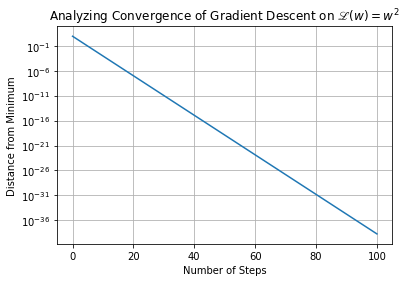

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
out = descent_down_parabola(w_start=10, learning_rate=0.3, num_steps=100)
ax.plot(np.abs(out))
ax.set_yscale("log")
ax.grid(True)

ax.set_ylabel("Distance from Minimum")
ax.set_xlabel("Number of Steps")
ax.set_title(r"Analyzing Convergence of Gradient Descent on $\mathscr{L}(w)=w^2$");


Describe the mathematical form of the trajectory of $w$ towards the minimum.

> We see $w$ approaches ever closer to the true minimum of $w^2$ via the iterative process of gradient descent. The distance between $w$ and the minimum ($0$) decreases exponentially quickly with number of descent steps. This is apparent from the linearly-decreasing form of the distance-from-the-minimum versus number of steps, **viewed on a logarithmic scale for the y-axis**.

Does the process of gradient descent ever lead $w$ away from the minimum?
Try experimenting with different learning rates before you come to a final conclusion.

> Increasing the learning rate can lead to updates to $w$ that are so large that we end up inadvertently _ascending_ the parabola.
> That is, each step results in us leaping from one side of the parabola to the other, and further away from the minimum than we were before.
> See this below, where we increase the learning rate from $0.3$ to $3.0$

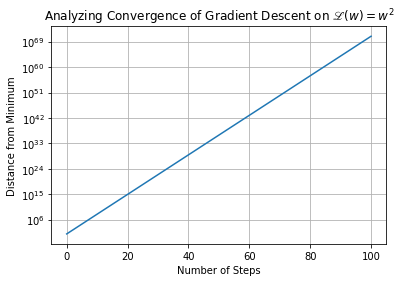

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
out = descent_down_parabola(w_start=10, learning_rate=3, num_steps=100)
ax.plot(np.abs(out))
ax.set_yscale("log")
ax.grid(True)

ax.set_ylabel("Distance from Minimum")
ax.set_xlabel("Number of Steps")
ax.set_title(r"Analyzing Convergence of Gradient Descent on $\mathscr{L}(w)=w^2$");


**Descent Down a Parabolic Surface in Python**:
    
Complete the following Python function that implements gradient descent on the skewed paraboloid $\mathscr{L}(w_1, w_2) = 2 w_1^2 + 3 w_2^2$.

Note that the partial derivatives of this function are simply
    
\begin{equation}
\frac{\partial \mathscr{L}(w_1, w_2)}{\partial x} = 4 w_1 \\
\frac{\partial \mathscr{L}(w_1, w_2)}{\partial y} = 6 w_2 \\
\end{equation}

Test your function using the inputs `w_start=np.array([2,4])`, `learning_rate=0.1`, and `num_steps=5` and, by hand, confirm that your function correctly performed the first gradient step.
Repeat this computation using `xy_start=np.array([-2,-4])`, and see that gradient descent reliably coaxes $\vec{w}$ in the opposite direction - still towards the global minimum of the paraboloid.

```python
import numpy as np

def descent_down_2d_parabola(w_start, learning_rate, num_steps):
    """
    Performs gradient descent on L(w1, w2) = 2 * w1 ** 2 + 3 * w2 **2 , 
    returning the sequence of w-values: [w_start, ..., w_stop]

    Parameters
    ----------
    w_start : np.ndarray, shape-(2,)
        The initial value of (w1, w2).

    learning_rate : float
        The "learning rate" factor for each descent step. A positive number.

    num_steps : int
        The number subsequent of descent steps taken. A non-negative number.

    Returns
    -------
    numpy.ndarray, shape-(num_steps + 1, 2)
        The sequence of (w1, w2)-values produced via gradient descent, starting 
        with w_start
    """
    xy_values = [w_start]
    for _ in range(num_steps):
        xy_old = xy_values[-1]
        xy_new = xy_old - learning_rate * (np.array([4., 6.]) * xy_old)
        xy_values.append(xy_new)
    return np.array(xy_values)

>>> descent_down_2d_parabola((2, 4), 0.1, 5)
array([[2.     , 4.     ],
       [1.2    , 1.6    ],
       [0.72   , 0.64   ],
       [0.432  , 0.256  ],
       [0.2592 , 0.1024 ],
       [0.15552, 0.04096]])

>>> descent_down_2d_parabola((-2, -4), 0.1, 5)
array([[-2.     , -4.     ],
       [-1.2    , -1.6    ],
       [-0.72   , -0.64   ],
       [-0.432  , -0.256  ],
       [-0.2592 , -0.1024 ],
       [-0.15552, -0.04096]])
```